In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist = tf.keras.datasets.mnist #dataset com imagens em escala de cinza com dimensão 28x28

(x_train, y_train), (x_test, y_test) = mnist.load_data() #extrai os dados do dataset



Text(0.5, 0, 'O número é: 6')

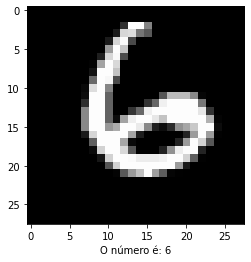

In [4]:
numImage = 48864 #@param {type:"slider", min:0, max:59999, step:1}
primeiraImagem = np.array(x_train[numImage], dtype='uint8')
pixels = primeiraImagem.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.xlabel(f"O número é: {y_train[numImage]}")

In [5]:
x_train.shape

(60000, 28, 28)

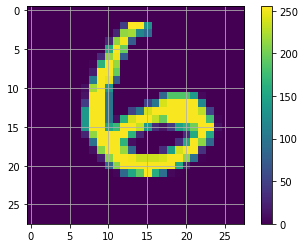

In [6]:
plt.figure()
plt.imshow(x_train[numImage])
plt.colorbar()
plt.grid(True)#plota com grade
plt.show()

Ajustando resolução de pixels de conjunto de treino e teste para intervalo entre [0,1]

In [8]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # dividir o pelo valor 255 faz com que o valor de 0 ou 1, 0 sendo preto e 1 sendo branco.

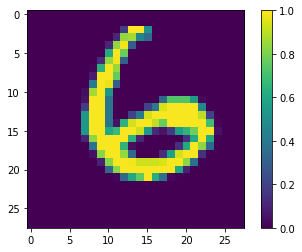

In [9]:
plt.figure()
plt.imshow(x_train[numImage])
plt.colorbar()
plt.grid(False)
plt.show()

Adicionando duas camadas Dense, com uma ativação "relu" e 1000 neurônios. Modelo conta com camada de 10 neurônios que retornam 10 probabilidades

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #para a primeira camada de um modelo sequencial precisamos passar o formado da entrada
  tf.keras.layers.Dense(1000,  activation="relu"), #Os parâmetros importante são apenas número de neurônios e função de ativação
  tf.keras.layers.Dense(500,  activation="relu"),
  tf.keras.layers.Dense(20)
])

## Predição e Função de Perda

In [11]:
predicoes = model(x_train).numpy()
funcaoDePerda = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #Calcula a perda de entropia cruzada entre os rótulos e as previsões.

## Compilação do modelo

In [14]:
#Otimizadores
model.compile(optimizer='SGD',
              loss=funcaoDePerda,
              metrics=['accuracy'])
#A otimização de Adam é um método de descida gradiente estocástico baseado na estimativa adaptativa de momentos de primeira e segunda ordem.

## Treinamento


In [15]:
model.fit(x_train, y_train, validation_split=0.2, epochs=5, batch_size=64)
#a função v alidation_split keras torna fácil para o usuário dividir o conjunto de dados de treinamento em treinamento e validação
#epochs = interações com o conjunto de dados
#batch_size Número de amostras por atualização de gradiente, default = 32.

Epoch 1/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0144 - accuracy: 0.9953 - val_loss: 0.0744 - val_accuracy: 0.9799
Epoch 2/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0713 - val_accuracy: 0.9808
Epoch 3/5
750/750 [==============================] - 7s 9ms/step - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0698 - val_accuracy: 0.9820
Epoch 4/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0690 - val_accuracy: 0.9826
Epoch 5/5
750/750 [==============================] - 6s 9ms/step - loss: 0.0071 - accuracy: 0.9984 - val_loss: 0.0685 - val_accuracy: 0.9827


## Exibindo Resultados

In [16]:
cost, acc = model.evaluate(x_test,  y_test, verbose=2)
print(f"Custo: {cost}\nAcurácia: {acc}")

#Retorna o valor de perda e os valores de métrica para o modelo no modo de teste


313/313 - 1s - loss: 0.0573 - accuracy: 0.9845
Custo: 0.05733514949679375
Acurácia: 0.984499990940094


Text(0.5, 0, 'O número predito foi 10 com  35% de confiança')

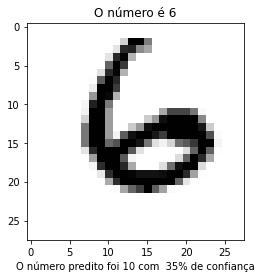

In [17]:

predicaoEscolhida = predicoes[numImage]
predicaoLegenda = np.argmax(predicaoEscolhida)
predicaoMaxima= np.max(predicaoEscolhida)*100
imagem = x_train[numImage]

plt.imshow(imagem, cmap=plt.cm.binary)

plt.title(f"O número é {y_train[numImage]}")
plt.xlabel(f"O número predito foi {predicaoLegenda} com  {predicaoMaxima:2.0f}% de confiança".format(color="green"))
